# THz Testing Notebook 

In [1]:
import thz
import numpy as np
from  matplotlib import pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["axes.grid"] = True

In [4]:
file_path = 'D:\\THz\\Samples\\Arandano_01.csv'

In [5]:
thz_image = thz.THZImage(file_path)

In [5]:
pulse = thz_image.get_column_index(13,20)

In [6]:
reference = thz_image.reference

In [7]:
pulse.shape

(2048,)

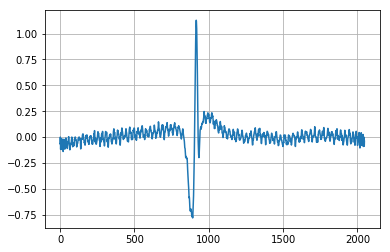

In [8]:
plt.plot(pulse)

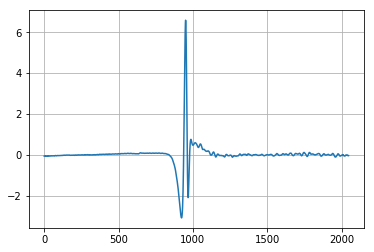

In [9]:
plt.plot(reference)

In [10]:
fft_ref = np.abs(np.fft.fft(reference))

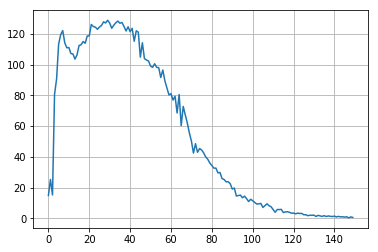

In [11]:
plt.plot(fft_ref[0:150])

In [12]:
fft = np.abs(np.fft.fft(pulse[600:1200]))

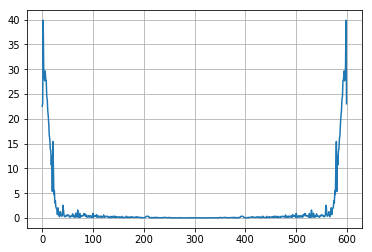

In [13]:
plt.plot(fft)

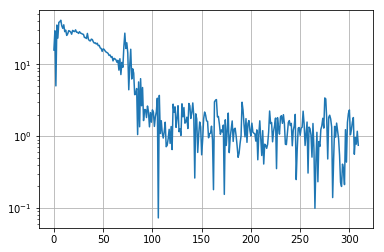

In [14]:
plt.semilogy(np.abs(np.fft.fft(pulse))[0:310])

In [15]:
diferential = pulse-reference

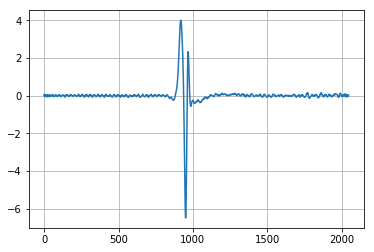

In [16]:
plt.plot(diferential)

In [17]:
ps_min, ps_max = -8.621907234, 33.61184383

In [18]:
t = np.linspace(ps_min,ps_max, pulse.shape[0])

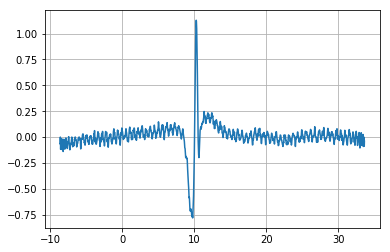

In [19]:
plt.plot(t,pulse)

In [20]:
# index_min = np.where(t>0)[0][0]

In [21]:
fourier = np.abs(np.fft.fft(pulse))

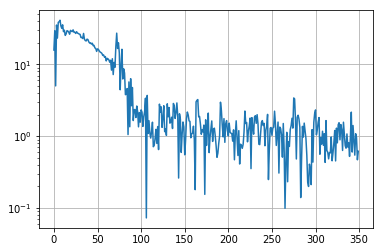

In [22]:
plt.semilogy(fourier[0:350])

In [23]:
fourier = np.abs(np.fft.fft(reference))

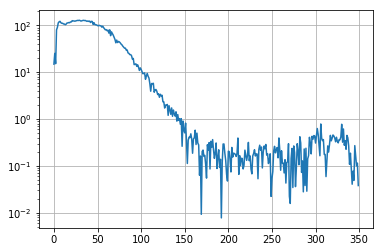

In [24]:
plt.semilogy(fourier[0:350])

In [29]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

# Image Processing

In [1]:
from scipy import ndimage
import thz
import numpy as np
from  matplotlib import pyplot as plt

In [2]:
file_path = 'D:\\THz\\Samples\\Arandano_01.csv'
thz_image = thz.THZImage(file_path)

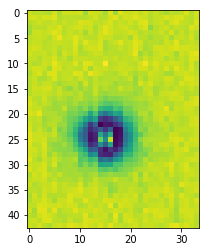

In [3]:
img = thz_image.get_img(850)
im = ndimage.gaussian_filter(img, 3)
plt.imshow(img)

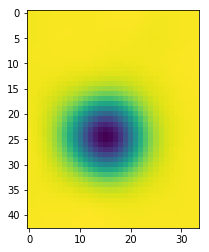

In [4]:
plt.imshow(im)

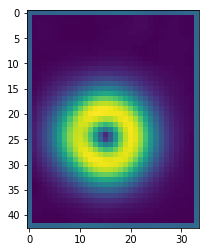

In [5]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
plt.imshow(sob)

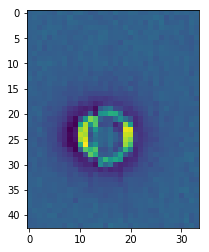

In [6]:
img = thz_image.get_img(900)
plt.imshow(img)

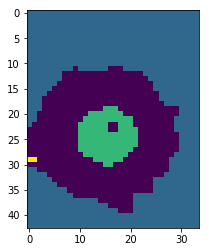

In [7]:
im = ndimage.gaussian_filter(img, 1)
mask = im > im.mean()
label_im, nb_labels = ndimage.label(mask)
plt.imshow(label_im) 

In [8]:
nb_labels

3

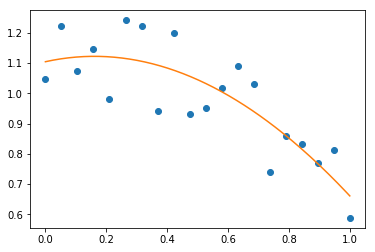

In [9]:
np.random.seed(12)

x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))

t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

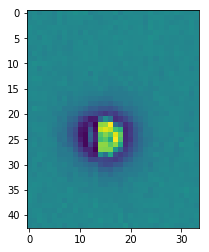

In [10]:
img = thz_image.get_img(870)
plt.imshow(img)

In [11]:
points = []
for i in range(800,900):
    img = thz_image.get_img(i)
    points.append(img>0.1)
points = np.array(points)

In [12]:
points.shape

(100, 43, 34)

0.1535871